In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
def ggg_dist(dotNH, sigma):
    D = sigma / (sigma + 1.0/(dotNH*dotNH) - 1.0)
    return D*D

In [3]:
def ggxalbedo(m):
    return 0.5 * m / ((m+1)**2)

[ 0.20671025  0.67948155]


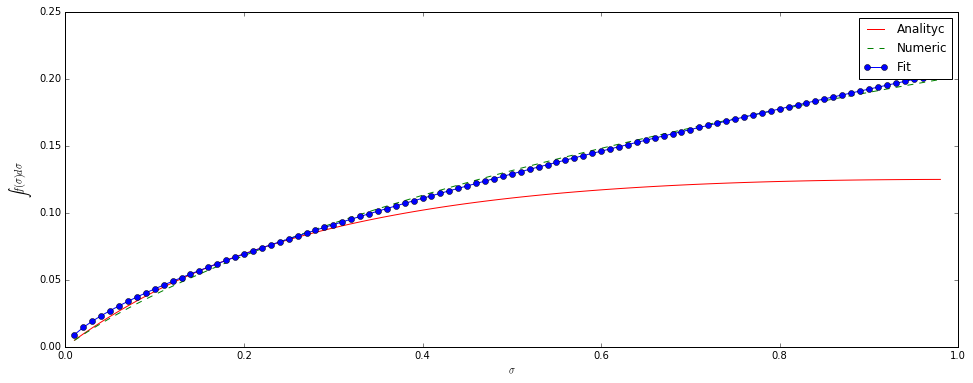

In [4]:
ms = np.arange(0.01, 0.99, 0.01)
dotnhs = np.arange(0.01, 1, 0.0001)

y1 = ggxalbedo(ms)
y2 = np.array([np.sum(ggg_dist(dotnhs, sigma)/len(dotnhs)) for sigma in ms])

def fitFunc(x, a, b):
    return a * x**b

fitParams, fitCovariances = curve_fit(fitFunc, ms, y2)
fitParams2 = np.array([ 0.17520987,  0.46372037])

fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(111, xlabel="$\sigma$", ylabel="$\int f(\sigma)d\sigma$")

a = ax.plot(ms, y1, "r", label="Analityc")
b = ax.plot(ms, y2, "g--", label="Numeric")
c = ax.plot(ms, fitFunc(ms, fitParams[0], fitParams[1]), "b-o", label="Fit")
l = ax.legend()

print (fitParams)

In [5]:
def ggr_dist(dotNH, sigma, gamma=2):
    D = sigma / (sigma + 1.0/(dotNH*dotNH) - 1.0)
    return D**gamma

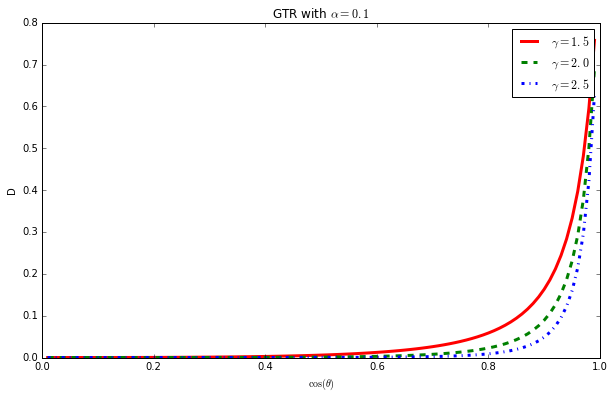

In [6]:
tethas = np.arange(0.01, 1, 0.01)

sigma = 0.1
gammas = [1.5, 2.0, 2.5]
linestyles = ['-','--','-.']
colors = ['r', 'g', 'b']

ygs = []
for idx, gamma in enumerate(gammas):
    y = ggr_dist(tethas, sigma, gamma)
    ls = linestyles[idx]
    clr = colors[idx]
    ygs.append((gamma, y, clr, ls))

fig2 = plt.figure(figsize = (10,6))
ax2 = fig2.add_subplot(111, xlabel="$\cos(\\theta)$", ylabel="D", title="GTR with $\\alpha={}$".format(sigma))


for gamma, y, clr, ls in ygs:
    pl = ax2.plot(tethas, y, color=clr, linestyle=ls, linewidth=3, label="$\gamma={}$".format(gamma))

leg = ax2.legend()